In [1]:
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt 
import os 
import glob
from plot_profiles_helper import *

In [97]:
# find the LES data
les_path = "/net/sampo/data1/zhaoyi/GCMForcedLES/cfsite"
flist = glob.glob(os.path.join(les_path, "*/HadGEM2-A/amip/*/stats/*.nc"))
ds = xr.open_mfdataset('/net/sampo/data1/zhaoyi/GCMForcedLES/cfsite/07/HadGEM2-A/amip/Output.cfsite17_HadGEM2-A_amip_2004-2008.07.4x/stats/Stats.cfsite17_HadGEM2-A_amip_2004-2008.07.nc', group = "profiles")

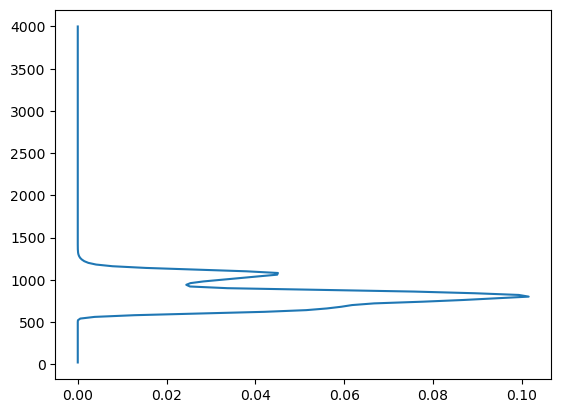

In [80]:
ds = xr.open_mfdataset(flist[8], group = "profiles")
plt.plot(ds["cloud_fraction"].mean(dim = "t"), ds.z)

In [81]:
ds["cloud_fraction"].max().values

array(0.6828125)

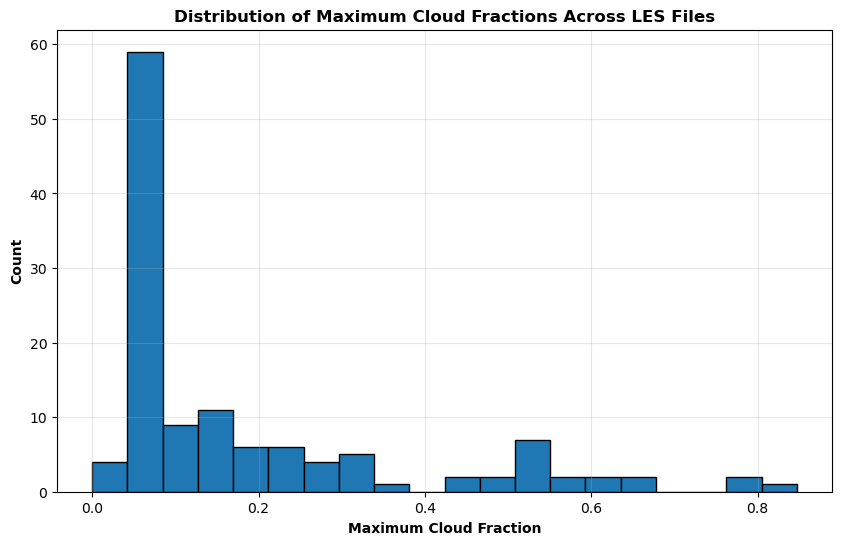

In [35]:
# Compute max cloud fraction for each file
max_cloud_fractions = []
for file_path in flist:
    ds = xr.open_mfdataset(file_path, group="profiles")
    max_cf = ds["cloud_fraction"].mean(dim = "t").max().values  # Get max value and convert to scalar
    max_cloud_fractions.append(max_cf)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(max_cloud_fractions, bins=20, edgecolor='black')
plt.xlabel('Maximum Cloud Fraction', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('Distribution of Maximum Cloud Fractions Across LES Files', weight='bold')
plt.grid(True, alpha=0.3)


In [78]:
# Filter flist to find files containing 'cfsite17'
cfsite17_files = [f for f in flist if 'cfsite17' in f]
print("Files containing cfsite17:", cfsite17_files)


Files containing cfsite17: ['/net/sampo/data1/zhaoyi/GCMForcedLES/cfsite/07/HadGEM2-A/amip/Output.cfsite17_HadGEM2-A_amip_2004-2008.07.4x/stats/Stats.cfsite17_HadGEM2-A_amip_2004-2008.07.nc', '/net/sampo/data1/zhaoyi/GCMForcedLES/cfsite/10/HadGEM2-A/amip/Output.cfsite17_HadGEM2-A_amip_2004-2008.10.4x/stats/Stats.cfsite17_HadGEM2-A_amip_2004-2008.10.nc']


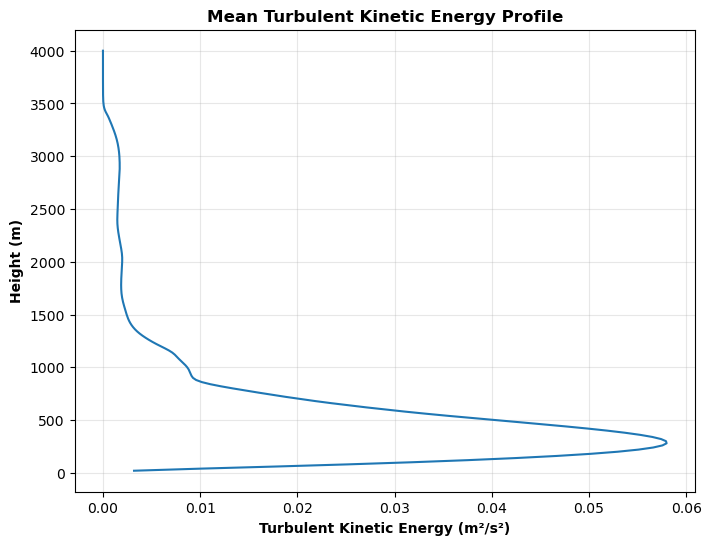

In [90]:
# Calculate TKE and plot it
plt.figure(figsize=(8, 6))
plt.plot(tke(ds).mean(dim = "t"), ds.z)
plt.xlabel('Turbulent Kinetic Energy (m²/s²)', weight='bold')
plt.ylabel('Height (m)', weight='bold')
plt.title('Mean Turbulent Kinetic Energy Profile', weight='bold')
plt.grid(True, alpha=0.3)
plt.show()

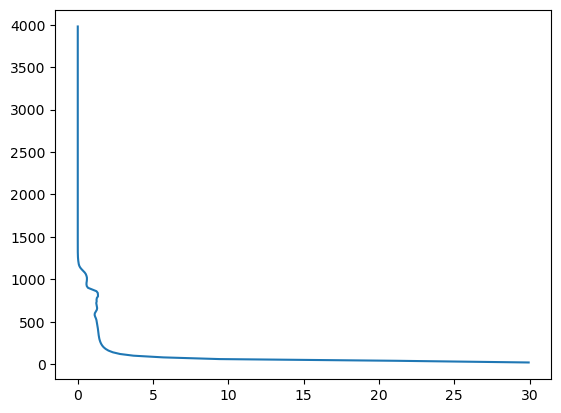

In [89]:
def tke(ds):
    return (ds["w_mean2"]) /2

def mixing_length(ds, cm = .17):
    return ds["viscosity_mean"] / np.sqrt(tke(ds)) / cm

plt.plot(mixing_length(ds).mean(dim = "t"), ds.z)
# plt.plot(ds["viscosity_mean"].mean(dim = "t"), ds.z)
# plt.plot(tke(ds).mean(dim="t"), ds.z)

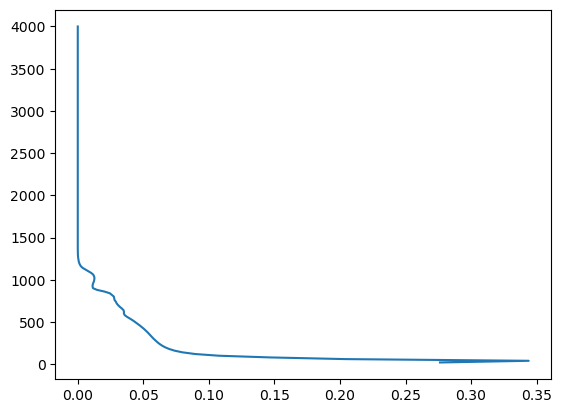

In [92]:
plt.plot(ds["viscosity_mean"].mean(dim = "t"), ds.z)

In [105]:
ds2 = xr.open_mfdataset('/net/sampo/data1/zhaoyi/GCMForcedLES/cfsite/07/HadGEM2-A/amip/Output.cfsite17_HadGEM2-A_amip_2004-2008.07.4x/stats/Stats.cfsite17_HadGEM2-A_amip_2004-2008.07.nc', group = "timeseries")
# ds2["obukhov_length_mean"].mean(dim = "t").values
list(ds.keys())

['z_half',
 'thetas_mean',
 'thetas_mean2',
 'thetas_mean3',
 'thetas_max',
 'thetas_min',
 'theta_mean',
 'theta_mean2',
 'theta_mean3',
 'theta_max',
 'theta_min',
 'rh_mean',
 'rh_max',
 'rh_min',
 'cloud_fraction',
 'cloud_cum_fraction',
 'qr_sedimentation_flux',
 'qr_autoconversion',
 'qr_accretion',
 'qr_evaporation',
 's_autoconversion',
 's_accretion',
 's_evaporation',
 's_precip_heating',
 's_precip_drag',
 'qr_mean',
 'qr_mean2',
 'qr_mean3',
 'qr_max',
 'qr_min',
 'qt_mean',
 'qt_mean2',
 'qt_mean3',
 'qt_max',
 'qt_min',
 's_mean',
 's_mean2',
 's_mean3',
 's_max',
 's_min',
 'u_mean',
 'u_translational_mean',
 'u_mean2',
 'u_mean3',
 'u_max',
 'u_min',
 'w_mean',
 'w_mean2',
 'w_mean3',
 'w_max',
 'w_min',
 'v_mean',
 'v_translational_mean',
 'v_mean2',
 'v_mean3',
 'v_max',
 'v_min',
 'qt_s_product_mean',
 'strain_rate_magnitude',
 'wind_speed',
 'wind_angle',
 's_flux_z',
 'qt_flux_z',
 'qr_flux_z',
 's_sgs_flux_z',
 'qt_sgs_flux_z',
 'qr_sgs_flux_z',
 'u_sgs_flux_z',
 